***Анализ оттока клиентов банка "Метанпром"***   


Ссылка на презентацию:  https://docs.google.com/presentation/d/1Ho5eu5Avrew1hf1Dw2X_8_M57v5VIvDenEQlB_ycPHI/edit?usp=sharing

**Цель проекта:**
На основе данных выявить причины оттока клиентов клиентов банка "Метанпром", подготовить рекомендации для отдела маркетинга.

**Данные, которые будут использованны в проекте**:  

    - USERID — идентификатор пользователя,  
    - score — баллы кредитного скоринга,  
    - city — город,  
    - gender — пол,  
    - age — возраст,  
    - equity — количество баллов собственности,   
    - balance — баланс на счёте,  
    - products — количество продуктов, которыми пользуется клиент,  
    - credit_card — есть ли кредитная карта,  
    - last_activity — активный клиент,  
    - EST_SALARY — оценочный доход клиента,  
    - сhurn — признак оттока.

# План:
## 1. Загрузка данных
## 2. Предобратка данных 
###	2.1 Анилиз пропусков. Определение природы пропусков: MCAR (данные отсутствуют совершенно случайно), MAR (данные отсутствуют условно случайно), MNAR (данные отсутствуют не случайно и они важны). Обработка пропусков. Причины их появления
###	2.2 Анализ явных дубликатов
###	2.3 Анилиз неявных дубликатов
###	2.4 Кодирование данных, при необходимости

## 3. Исследовательский анализ данных
###	3.1 Посчитать отток клиентов по банку в целом в процентах
###	3.2 Построить распределения для всех колличественных признаков (boxplot, histplot или displot): поиск отточных интервалов
###	3.3 Построить графики для всех категориальных данных (countplot, barplot): поиск признаков с оттоком выше, чем у банка в целом
###	3.4 Построить матрицу зависимостей. Изучить, какие признаки влияют на отток клиентов
###	3.5 Построить сводную таблицу для определения портрета клиента, выявить признаки попадающих в отток: для непрерывных данных считать среднее, для дискретных и категориальных - моду
###	3.6 Промежуточный выдод на основе проведенных исследований об анализ портрета клиента в разрезе оттока

## 4. Формулирвка гипотез
###	4.1 Гипотеза 1 - ее проверка методом 1 и обоснование
###	4.2 Гипотеза 2 - ее проверка проверка методом 2 и обоснование
## 5.	Формировани промежуточных выводов/результатов
## 6. Сегментация клиентов (не менее 3-х сегментов) по признакам с оттоком выше среднего в целом по банку и шириной сегмента не менее 500 клиентов.
## 7.	Приоритизация сегментов: на первом месте сегменты, на которые маркетинг должен обработать в первую очередь, т.е. с большим оттоком.
## 8. Общий вывод
## 7. Дашборд

## 1. Загрузка данных

In [1]:
#Выгружаем необходимые библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import seaborn as sns
import numpy as np
import phik
from phik.report import plot_correlation_matrix
from phik import report
import statistics as st
from scipy import stats as stat

In [3]:
#Подгружаем данные
import os
pth1 = 'C:\\Users\Tatiana\Desktop\Обучение\Проекты\Выпускной проект\\bank_scrooge.csv'
pth2 = '/datasets/bank_scrooge.csv'
if os.path.exists(pth1):
    data = pd.read_csv(pth1)
elif os.path.exists(pth2):
    data = pd.read_csv(pth2)
else:
    print("Проверьте правильность пути к датасету")

In [4]:
#Применение команды set_option для отображения всех строк и всех столбцов
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [5]:
#Выводим первые строки
data.head()

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1


## 2. Предобратка данных

In [6]:
#Сразу исправим наименование столбцов: приведем к нижнему регистру
data.columns  = data.columns.str.lower()
data.head(3)

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0


In [7]:
#Выведем типы данных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   userid         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  est_salary     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


Общая информация о датафрейме показала, что некоторые данные имеют некорретный тип, их необходимо заменить в колонках:  
- score (float64 на int,т.к. в колонке отражен год)  
- age (float64 на int, т.к. возраст измеряется в целых числах)

In [8]:
#Опишем данные 
pd.set_option("display.float_format", "{:.2f}".format)
data.describe()

,userid,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn
count,10000.00,10000.00,9974.00,10000.00,7705.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,171814.71,848.70,42.73,2.63,827794.31,1.87,0.68,0.52,147866.89,0.18
std,33708.24,65.45,12.18,1.98,1980614.15,0.79,0.47,0.50,139388.51,0.39
min,94561.00,642.00,18.00,0.00,0.00,0.00,0.00,0.00,2546.30,0.00
25%,142810.25,802.00,33.00,0.00,295554.16,1.00,0.00,0.00,75251.90,0.00
50%,172728.00,853.00,40.00,3.00,524272.20,2.00,1.00,1.00,119658.10,0.00
75%,201261.75,900.00,51.00,4.00,980705.85,2.00,1.00,1.00,174500.54,0.00
max,229145.00,1000.00,86.00,9.00,119113552.01,5.00,1.00,1.00,1395064.45,1.00


Исходя из описания данных, видим следующее:

    - средний скоринговый балл - 848 
    - средний возраст клиента 43 года, максимальный 86, минимальный 18
    - среднее кол-во объектов - 2, максимальное 9. 75 процентиль равен 4
    - средняя сумма на балансе криентов - около 830 тыс. руб., а максимальная - 119 млн руб. При построении графика распределения максимальная сумма баланса быдет выглядеть как выброс. 
    - количество продуктов в среднем 3, один из которых - кредитная карт (есть более чем у половины клиентов)  
    - средняя предполагаемая зарплата равна 147 тыс. руб., максимальная - 1,3 млн руб, что тоже будет "выбросом" на диаграмме.
    
При построении диаграмм распределения, так называемые выбросы лучше исключить: баланс и  предполагаемую зарплату ограничить 95 процентами наблюдений.


### 2.1 Анилиз пропусков. Определение природы пропусков: MCAR, MAR, MNAR. Обработка пропусков. Причины их появления.

In [9]:
#Посчитаем процент пропусков в колонках 
for col in data.columns:
    pct_missing = np.mean(data[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100,2)))

userid - 0.0%
score - 0.0%
city - 0.0%
gender - 0.0%
age - 0.26%
equity - 0.0%
balance - 22.95%
products - 0.0%
credit_card - 0.0%
last_activity - 0.0%
est_salary - 0.0%
churn - 0.0%


Большое количество пропусков в колонке `balance` (23%), также есть пропущенные значения в колонке `age`(менее 1%).  
Обработка пропусков будет зависеть от их характера. Чтобы более пристально посмотреть на пропущенные значения заменим их "заглушкой", например, -1 и подробнее изучим природу пропусков.

In [10]:
#Предварительно посчитаем churn (отток) чтобы понимать его долю
i = data['churn'].value_counts(normalize=True)
i

0   0.82
1   0.18
Name: churn, dtype: float64

In [11]:
#Изменим тип данных 
data['score'] = data['score'].astype('Int64')
data['age'] = data['age'].astype('Int64')

In [12]:
#Заменим пропуски в 'age', 'balance' заглушкой для удобства фильтрации
data.fillna(dict.fromkeys(['age', 'balance'], -1), inplace=True)

In [13]:
#Посчитаем долю клиентов в каждом филиале
client = data['city'].value_counts(normalize=True)
client

Ярославль   0.59
Рыбинск     0.27
Ростов      0.14
Name: city, dtype: float64

В Ярославле обслуживается больше всего клиентов, что логично, т.к. это региональный центр.

In [14]:
#Выведем строки с заглушками в колонках 'age'
age = data[data['age'].isin([-1])].pivot_table(index = ['city'], values = ['userid'], aggfunc = ['count']).reset_index()
age.columns = [' '.join(col).strip() for col in age.columns.values]
age

,city,count userid
0,Ростов,1
1,Рыбинск,12
2,Ярославль,13


In [15]:
#Выведем данные об этих клиентах 
data[data['age']==-1]

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1247,228075,932,Ярославль,М,-1,5,7601719.20,2,1,1,408121.16,0
2165,187635,692,Рыбинск,Ж,-1,0,-1.00,1,1,1,160368.82,0
2444,221156,913,Ярославль,М,-1,0,-1.00,1,1,1,135693.24,0
3091,138660,836,Ростов,Ж,-1,5,294315.53,2,0,1,63310.22,1
4912,210674,834,Рыбинск,М,-1,1,238330.52,2,0,1,93775.06,0
5470,218868,827,Рыбинск,Ж,-1,4,448959.07,2,1,1,67835.95,0
5495,151662,884,Рыбинск,Ж,-1,0,-1.00,1,1,1,137500.77,0
7236,210135,908,Рыбинск,Ж,-1,4,1120340.31,3,1,1,85002.15,0
7248,219343,920,Рыбинск,Ж,-1,0,-1.00,1,1,0,159248.67,0
7345,184913,829,Ярославль,Ж,-1,3,188648.77,2,0,1,75206.90,0


*Выводы по пропкскам в колонке `age`.*  

Пропуски в колонке `age` есть как у межчин, так у женщин. Однако, в большенстве случаев  пропуски имеются у тех клинтов, у которых:  
 - пропуски в балансе, 
 - количество продуктов чаща 1,
 - этот продукт кредитная карта,
 - все, за исключением 1-го, попадают в отток.  

Пропуски в колонке `age` имеют некую логику отсутствия и скорее всего относятся к типу пропусков `MNAR`.
Учитывая, что в нашем датасете таких ***пропусков менее 1%, просто удалим их***, то их удаление не приведет к искажению результатов. 

In [16]:
#Выведем строки с заглушками в колонках 'balance'
balance = data[data['balance'].isin([-1])].pivot_table(index = ['city','products','credit_card', 'equity'],\
                                                       values = ['userid'], aggfunc = ['count']).reset_index()
                                                       
balance.columns = [' '.join(col).strip() for col in balance.columns.values]
balance.sort_values(by = ('count userid'), ascending = False)

,city,products,credit_card,equity,count userid
20,Ярославль,1,1,0,1044
10,Рыбинск,1,1,0,353
24,Ярославль,2,1,0,147
18,Ярославль,1,0,0,147
2,Ростов,1,1,0,118
8,Рыбинск,1,0,0,115
14,Рыбинск,2,1,0,78
0,Ростов,1,0,0,75
21,Ярославль,1,1,1,61
22,Ярославль,2,0,0,28


Пропуски в колонке `balance` лидируют в Ярославе, они в три раза превышают ближайший по количеству пропусков филиал.  
Больше всего пропусков у тех клиентов, кто **имеет один продукт и это кредитная карта**, а собственность стремиться к 0.   

Также есть клиент у которого отсутствует продукт, что странно. Есть клиенты с 3-мя продуктами, но их количество незначительное.  
Построим график по `Ярославлю`, где преобладает число пропущенных значений в колонке `balance`.

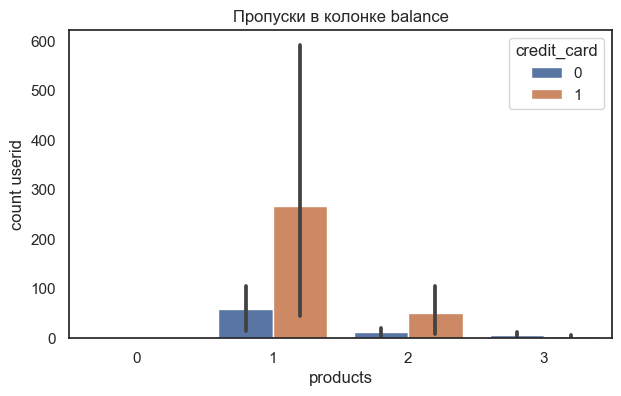

In [17]:
#Построим график со значением  hue='credit_card' для Ярославля, где пропусков больше всего.
sns.set(rc={'figure.figsize':(7,4)})
sns.set_style('white')
plt.title('Пропуски в колонке balance', size=12)
plt.xlabel('есть_нет кридитная карта')
plt.ylabel('Число клиентов')
sns.barplot(x='products', y='count userid', hue='credit_card', data=balance)
plt.show()

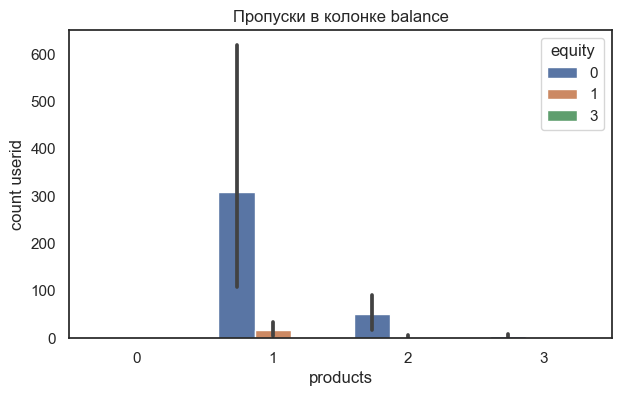

In [18]:
#Построим график со значением  hue='equity' для Ярославля, где пропусков больше всего.
sns.set(rc={'figure.figsize':(7,4)})
sns.set_style('white')
plt.title('Пропуски в колонке balance', size=12)
plt.xlabel('есть_нет кридитная карта')
plt.ylabel('Число клиентов')
sns.barplot(x='products', y='count userid', hue='equity', data=balance)
plt.show()

*Выводы по пропкскам в колонке `balance`.*   
Пропуски в колонке `balance` связаны в основном с **наличием кредитной карты, отсутствием других продуктов и собственности у клиента**. Можно предположить, что карты оформлялись в торговых точках для потребительского кредитования. Так как клиентами эти люди стали случайно и других продуктов в банке у них нет, то отсюда пропуски в графе `balance`.  

Данные пропуски стоит отнести к типу `MNAR` - зависят от других данных. Учитывая, что доля данных пропусков существенна, их удаление может исказить анализ.
Для дальнейшего анализа оставим "заглушку" вместо пропусков в колонке `balance`.

In [19]:
#Исключаем строки с пропусками из датасета.
data_new = data.query('age != -1',engine='python').copy()

### 2.2 Анализ явных дубликатов

Проверим данные на наличие явных и неявных дубликатов.

In [20]:
#Проверим наличие явных дубликатов
data_new.duplicated().sum()

0

Явные дубликаты отсутствуют.

###  2.3 Анилиз неявных дубликатов

In [21]:
#Посмотрим какие уникальные значения есть в колонках
for col in data_new:
    print(col, data_new[col].unique())

userid [183012 146556 120722 ... 115639 148700  96267]
score <IntegerArray>
[850, 861, 892, 866, 730, 856, 807, 825, 923, 906,
 ...
 654, 680, 998, 660, 670, 656, 665, 662, 704, 995]
Length: 348, dtype: Int64
city ['Рыбинск' 'Ярославль' 'Ростов']
gender ['Ж' 'М']
age <IntegerArray>
[25, 37, 30, 51, 34, 56, 39, 38, 54, 67, 52, 41, 31, 28, 35, 42, 45, 53, 40,
 43, 47, 48, 61, 62, 36, 26, 27, 60, 72, 50, 46, 55, 58, 71, 44, 49, 33, 32,
 66, 29, 68, 73, 69, 59, 21, 65, 57, 63, 80, 24, 70, 77, 64, 23, 20, 18, 19,
 78, 74, 76, 22, 75, 83, 82, 81, 84, 79, 86]
Length: 68, dtype: Int64
equity [1 5 0 4 3 2 6 7 8 9]
balance [ 5.9214820e+04  8.5059433e+05 -1.0000000e+00 ...  7.8144650e+04
  8.6545797e+05  1.1808867e+06]
products [2 3 1 4 5 0]
credit_card [0 1]
last_activity [1 0]
est_salary [ 75719.14  86621.77 107683.34 ... 108905.09  86874.9   21422.37]
churn [1 0]


В колонке `products` есть значения, равные 0 что нереально, т.к. не имея продуктов в банке, человек не может являеться его клиентом. Посчитаем количество таких значений.

In [22]:
#Посчитаем количество каждого продукта
data_new['products'].value_counts()

2    5119
1    3323
3    1038
4     474
5      19
0       1
Name: products, dtype: int64

In [23]:
#Выведем данные о клиенте,у которого products равне 0 
data_new[data_new['products']==0]

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
8957,147837,962,Рыбинск,Ж,79,3,-1.00,0,0,0,25063.96,1


In [24]:
#Исключим этого клиента - у него отсутствует баланс и нет активности
data_new = data_new.query('products != 0',engine='python').copy()

In [25]:
#Посчитаем количество будликатов в колонке 'userid', где значения должны быть уникальными
d = data_new['userid'].duplicated(keep=False).sum()
d

100

Обнаружилось 100 дубликатов или 1% от общего количества наблюдений. 
Изучим приподу задвоения. 


In [26]:
dpl = data_new.duplicated(subset='userid')
dupl = data_new[dpl == True]

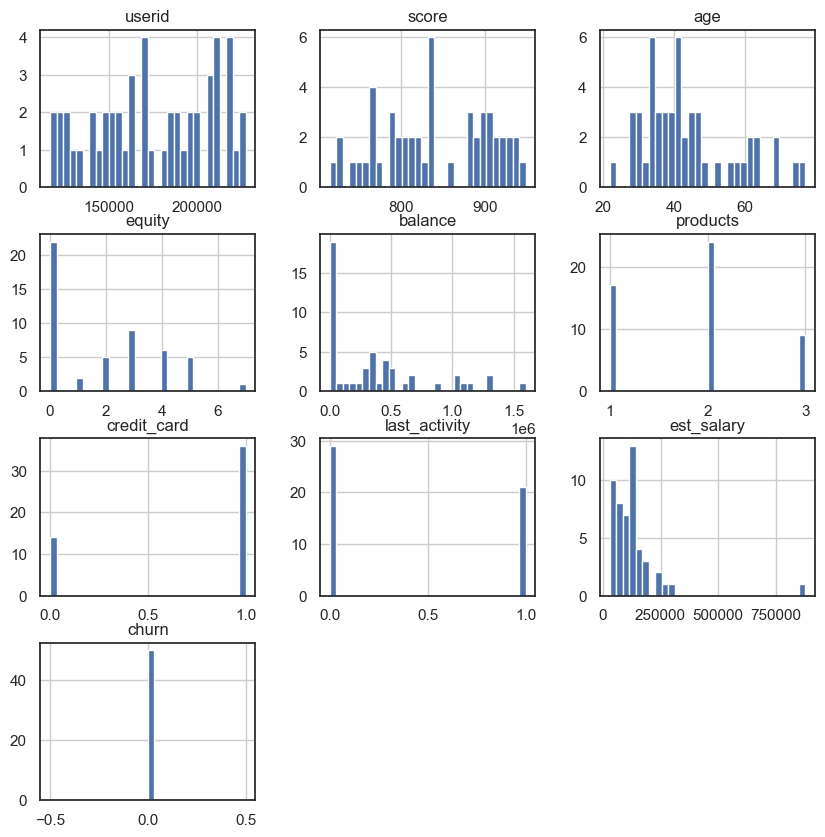

In [27]:
#Построим распределение для выявленных дубликатов 
dupl.hist(bins=30, figsize=(10,10));

*Выводы по дубликатам в колонке `userid`.*  

Природу задвоения вряд ли удастся выяснить с учетом имеющихся данных. Однако, есть общая тенденция - эти клиенты попадают в отток и большая часть не активна, имеет кредитную карту, 1-2 продукта, а также заметное количество пропусков в колонке `balance`, чаще не имеет собственности.   

Возможно 1-2 продукта это кредитные карты (или иные кредитные продукты), оформленные не в офисе банка. Задвоения/ошибки появились при загрузке данных в базу банка. 

Учитывая их незначительную долю в общем объеме наблюдений, а также то, что этот столбец не будет использован в дальнейшем анализе, удалим дубликаты, выявленные в колонке `userid`.

In [28]:
# #Удалим будликаты и проверим результат
data_new = data_new.drop_duplicates (subset=['userid']).copy()
i = data_new['userid'].duplicated().sum()
i

0

### 2.4 Кодирование данных, при необходимости

Необходимость кодирования отсутствует - для расчета нелинейной корреляции будет использован метод `phik`.

In [29]:
#Закодируем города для дальнейшего исследовательского анализа
# city_cod =  ['Ярославль','Рыбинск', 'Ростов']
# for i in city_cod:
#     data_new[i] = data_new['city'].str.contains(i).astype('int')

In [30]:
#Закодируем пол для дальнейшего исследовательского анализа
# gender_cod =  ['М', 'Ж']
# for i in gender_cod:
#     data_new[i] = data_new['gender'].str.contains(i).astype('int')
    
# data_new.head(3)

Вывод по разделу предобработка данных. 
1) Был изменен тип данных в колонках `score` и `age`на int.  
2) Обнаружены выбросы в колонках `balance` и `est_salary`, будут учтены в дальнешем анализе.  
3) Пропуски в `balance` (23%) и `age` (менее 1%) были заменены заглушкой -1. Тип пропусков в обеих колонках определен как `MNAR`, из-за незначильтельной доли пропуски в `age`. В колонке `balance` пропуски скорее всего образовались из-за того, что карты выдавались не в банке, а в торговых точках, клиентами банка они являются формально, других продуктов не имеют.   
4) Явных дубликатов не выявлено.  
5) Неявные дубликаты обнаружены в колонке `'userid'` -  1% от общего числа наблюдений. Припода задвоей не ясна, возможнос клиенты оформлялись не в банке и при подгрузке данных в базу банке произошли ошибки. Из-за небольшого обхъема, задвоения были удалены. 



## Исследовательский анализ данных

### 3.1 Посчитать отток клиентов по банку в целом в процентах

In [31]:
#Для удобства выведем первые строки.
data_new.head(3)

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
0,183012,850,Рыбинск,Ж,25,1,59214.82,2,0,1,75719.14,1
1,146556,861,Рыбинск,Ж,37,5,850594.33,3,1,0,86621.77,0
2,120722,892,Рыбинск,Ж,30,0,-1.00,1,1,1,107683.34,0


In [32]:
data_new['churn'].mean()

0.1832107225637408

В целом по банку отток 18%.

### 3.2 Построить распределения для всех колличественных признаков (histplot): поиск отточных интервалов

Построим распределения для каждой колонки, предварительно обрезав "выбросы" (крайние значения) из датасета.

In [33]:
#Для дальнейшего анализа срежем выбросы в данных 
q_b = data_new['balance'].quantile(0.95)
q_s = data_new['est_salary'].quantile(0.95)

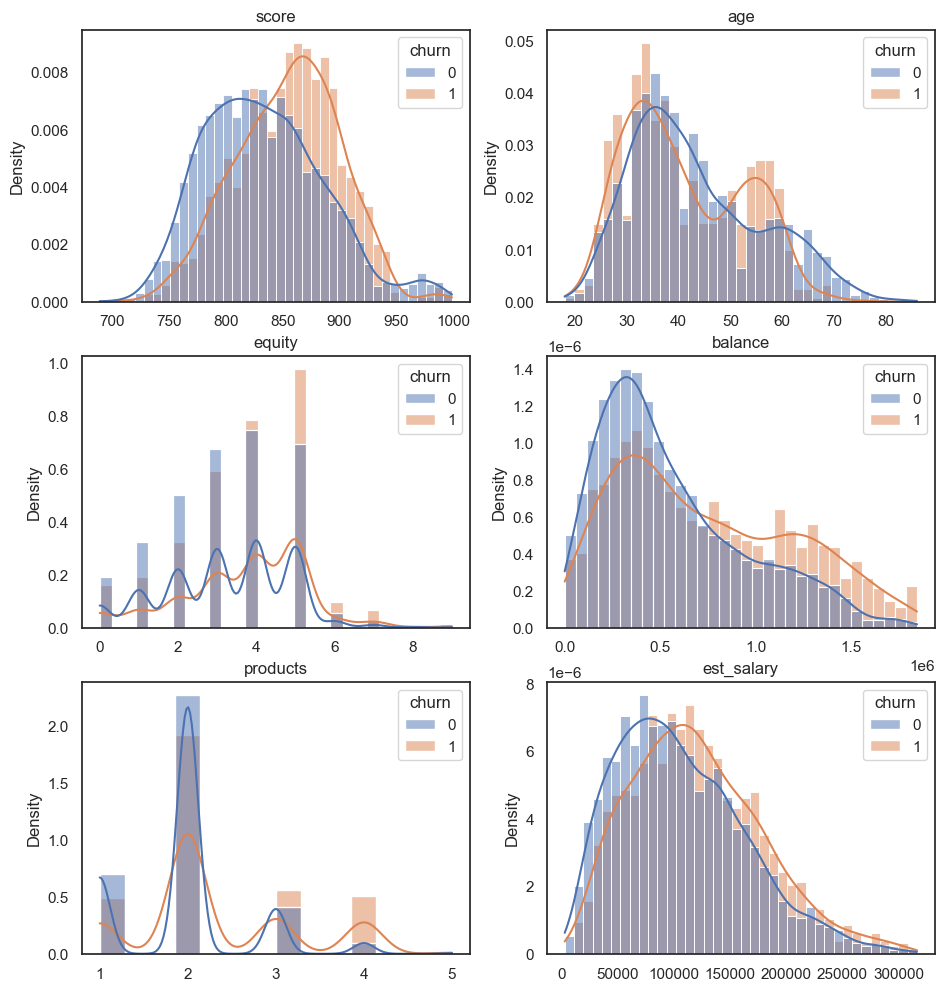

In [114]:
#Строим распределение для непрерывных числовых значений

other = ['score', 'age', 'equity', 'balance', 'products', 'est_salary']

rows = 2
fig, ax = plt.subplots(nrows=rows+1, ncols=2, figsize=(11,12))
ax = ax.flatten()
for i in range(len(other)):
    sns.histplot(data = data_new[(data_new['balance'] <=q_b)&(data_new['est_salary'] <= q_s)&(data_new['balance']!=-1)],\
                 x=data_new[other[i]], hue = 'churn', ax=ax[i],kde = True, stat="density", common_norm=False)
    ax[i].set_title(f'{other[i]}')
    ax[i].set_xlabel('')

***Интервалы оттока*** в результате распределения непрерывных значений:  
    - выше среди клинтов с баллами от 850 до 900,   
    - в возрасте от 30-35 и меньший пик 55-60 лет,  
    - в собственности 4-5 объектов,  
    - с балансом в 350 - 500 тыс. руб.,  
    - с двумя продуктами (возможно один из которых депозит)  
    - с з/п от 100 0000 до 150 000 руб.

### 3.3 Построить графики для всех категориальных данных (barplot): поиск признаков с оттоком выше, чем у банка в целом

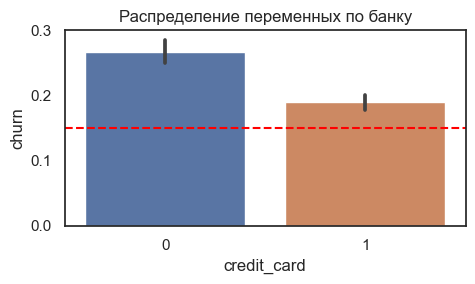

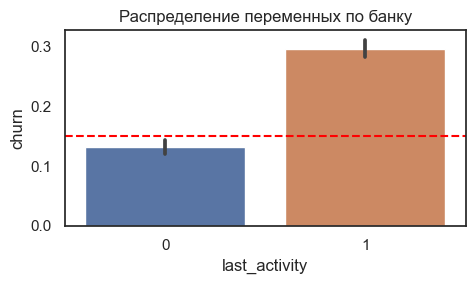

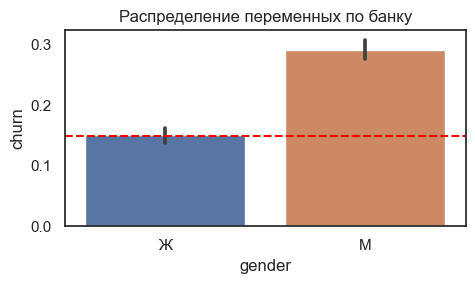

In [35]:
#Построим распределение в целом по банку для булевых переменных
biscret_data = data_new[['credit_card', 'last_activity','gender']]
for col in biscret_data.columns.values:
    plt.figure(figsize=(5, 3))
    sns.barplot(x=biscret_data[col], y = 'churn', data = data_new[(data_new['balance'] <=q_b)&(data_new['est_salary']<= q_s)\
                                                                  &(data_new['balance']!=-1)])
    plt.axhline(y=0.15, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel(col)
    plt.title('Распределение переменных по банку')

    plt.tight_layout()
    plt.show() 

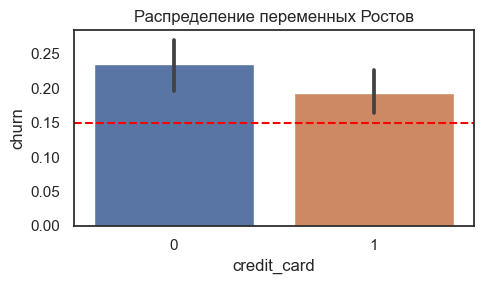

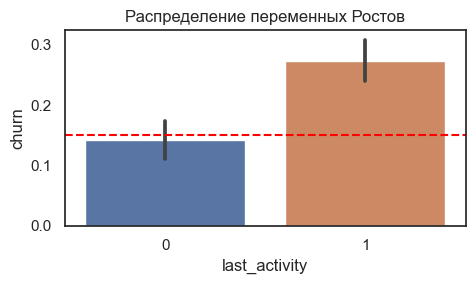

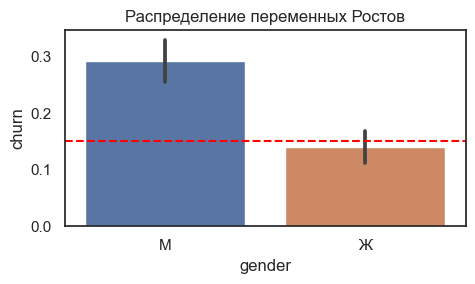

In [36]:
#Построим распределение для Ростова для булевых переменных
data_new_1 = data_new.query('city == "Ростов"')
biscret_data = data_new_1[['credit_card', 'last_activity','gender']]
for col in biscret_data.columns.values:
    plt.figure(figsize=(5, 3))
    sns.barplot(x=biscret_data[col], y = 'churn', data =data_new[(data_new['balance'] <=q_b)&(data_new['est_salary']<= q_s)\
                                                                  &(data_new['balance']!=-1)])
    plt.axhline(y=0.15, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel(col)
    plt.title('Распределение переменных Ростов')

    plt.tight_layout()
    plt.show() 

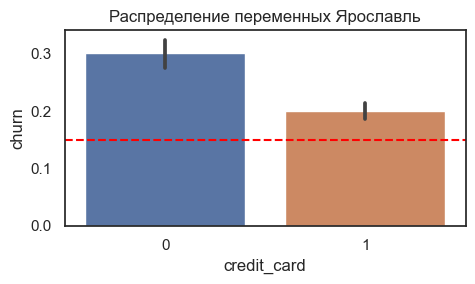

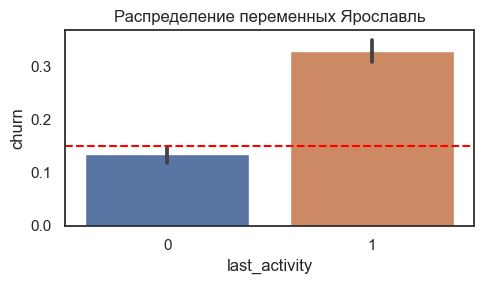

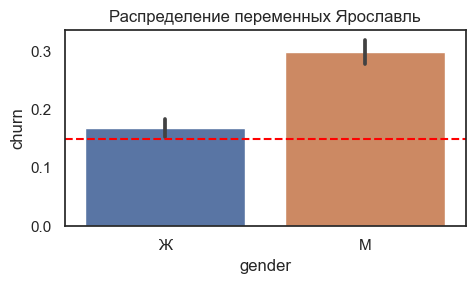

In [37]:
#Построим распределение для Ярославля для булевых переменных
data_new_2 = data_new.query('city == "Ярославль"')
biscret_data = data_new_2[['credit_card', 'last_activity','gender']]
for col in biscret_data.columns.values:
    plt.figure(figsize=(5, 3))
    sns.barplot(x=biscret_data[col], y = 'churn', data =data_new[(data_new['balance'] <=q_b)&(data_new['est_salary']<= q_s)\
                                                                  &(data_new['balance']!=-1)])
    plt.axhline(y=0.15, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel(col)
    plt.title('Распределение переменных Ярославль')

    plt.tight_layout()
    plt.show() 

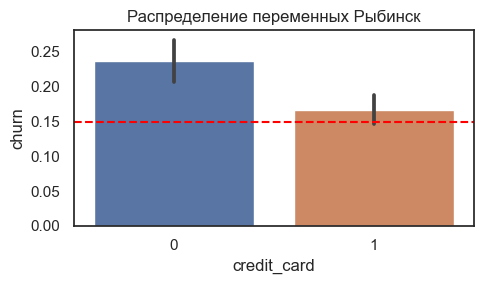

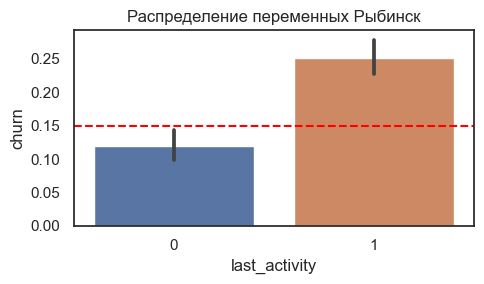

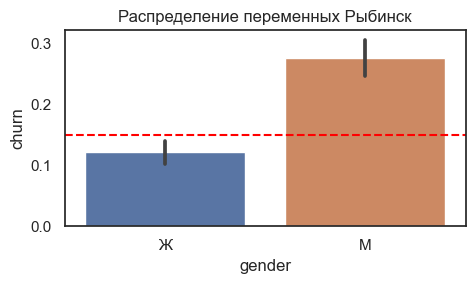

In [38]:
#Построим распределение для Рыбинска для булевых переменных
data_new_2 = data_new.query('city == "Рыбинск"')
biscret_data = data_new_2[['credit_card', 'last_activity','gender']]
for col in biscret_data.columns.values:
    plt.figure(figsize=(5, 3))
    sns.barplot(x=biscret_data[col], y = 'churn', data = data_new[(data_new['balance'] <=q_b)&(data_new['est_salary']<= q_s)\
                                                                  &(data_new['balance']!=-1)])
    plt.axhline(y=0.15, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel(col)
    plt.title('Распределение переменных Рыбинск')

    plt.tight_layout()
    plt.show() 

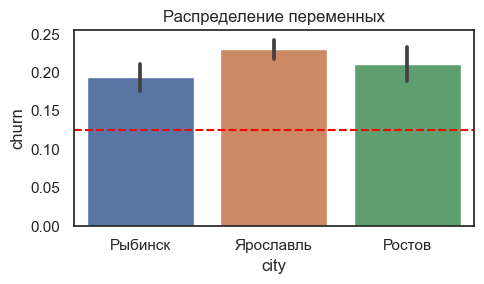

In [39]:
#Построим распределение для дискретных переменных
biscret_data = data_new[['city']]
for col in biscret_data.columns.values:
    plt.figure(figsize=(5, 3))
    sns.barplot(x=biscret_data[col], y = 'churn', data =data_new[(data_new['balance'] <=q_b)&(data_new['est_salary']<= q_s)\
                                                                  &(data_new['balance']!=-1)])
    plt.axhline(y=0.125, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel(col)
    plt.title('Распределение переменных')

    plt.tight_layout()
    plt.show() 

Отток ***выше среднего*** по банку в целом наблюдается:  
 - по всем городам  
 - y мужчин  
 - имеющих и не имеющих кредитную карту
 - активные клиенты  
  
Отток ***выше среднего*** в Ростове целом наблюдается:
 - y мужчин  
 - имеющих и не имеющих кредитную карту
 - активные клиенты  
  
Отток ***выше среднего*** в Ярославле наблюдается:
 - y мужчин и женщин
 - имеющих и не имеющих кредитную карту
 - активные клиенты  
  
Отток ***выше среднего*** в Рыбинске  наблюдается:
 - y мужчин  
 - имеющих и не имеющих кредитную карту
 - активные клиенты

### 3.4 Построить матрицу зависимостей. Изучить, какие признаки влияют на отток клиентов

In [40]:
#Построим матрицу нелинейных зависимостей предварительно срезвав выдросы с данных и данные с пропусками в балансе 
data_new = data_new.query('balance <= @q_b and est_salary <= @q_s and balance != -1',engine='python').copy()
interval = ['userid','score', 'age', 'equity', 'balance', 'est_salary']
phik_overview = data_new.phik_matrix(interval_cols= interval)                                 

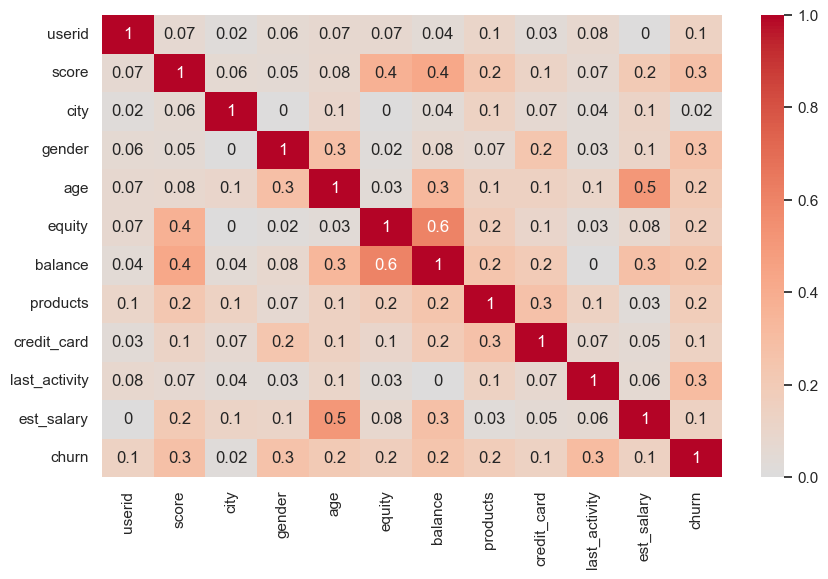

In [41]:
#По мартице нелиней ных зависимотрей построим тепловую карту
fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(phik_overview, annot = True, fmt='.1g', cmap='coolwarm', center=0);

In [42]:
#Посмотрим интересующие нас зависимости подробнее
phik_overview['churn'].sort_values(ascending=False)

churn           1.00
last_activity   0.31
score           0.28
gender          0.26
balance         0.25
age             0.21
products        0.19
equity          0.17
est_salary      0.14
userid          0.14
credit_card     0.14
city            0.02
Name: churn, dtype: float64

Для оценки силы связей между признаками применим шкалу `Чеддока`:  
 - слабая — от 0,1 до 0,3;
 - умеренная — от 0,3 до 0,5; 
 - заметная — от 0,5 до 0,7;
 - высокая — от 0,7 до 0,9;
 - весьма высокая (сильная) — от 0,9 до 1,0

Вы воды по Матрица нелинейных корриляций:   

1) Зависимость ***заметная - высокая*** между:  
- возрастом и з\пл: чем выше возраст, тем больше заработок  
- количеством имущества и балансом: чем больше имущества, тем больше остаток на счете 

2) Зависимость ***умеренная*** между: 
- оценкой скоринга и  количеством имущества,балансом, оттоком: чем больше денег на счету клиента,имущества -тем выше к нему доверие у банка и тем с большей вероятностью он попадет в отток
- оттоком и оценкой, полом, балансом: чем выше отток, тем выше оценка банка и баланс клиента - мужского пола 

### 3.5 Построить сводную таблицу для определения портрета клиента, выявить признаки попадающих в отток: для непрерывных данных считать среднее, для дискретных и категориальных - моду

In [43]:
#Cгруппируем данные, рассчитаем средние, медианные значения и моду для тех, кто ушел в отток и тех, кто остался.
df_difference = data_new.groupby('churn')[['age','score','est_salary','balance','equity','products']].\
                                         agg({'age':np.median, 'score':np.average,'est_salary':np.median,'balance':np.median, \
                                           'equity':st.mode,'products':st.mode}).T.round(2)
df_difference['difference'] = ((df_difference[1]/df_difference[0]) - 1) * 100
df_difference

churn,0,1,difference
age,41.00,39.00,-4.88
score,833.44,855.00,2.59
est_salary,97202.34,114634.58,17.93
balance,454247.27,648944.38,42.86
equity,4,5,25.00
products,2,2,0.00


In [44]:
#Cгруппируем категориальные признаки и расчитаем моду тех, кто ушел в отток и тех, кто остался.
df_difference_cat = data_new.groupby('churn')[['gender','city','credit_card','last_activity']].\
                                         agg({'credit_card':st.mode,'last_activity':st.mode,
                                            'gender':st.mode,'city':st.mode}).T.round(2)
df_difference_cat

churn,0,1
credit_card,1,1
last_activity,0,1
gender,Ж,М
city,Ярославль,Ярославль


In [45]:
pd.concat([df_difference,df_difference_cat],axis=0)

churn,0,1,difference
age,41.00,39.00,-4.88
score,833.44,855.00,2.59
est_salary,97202.34,114634.58,17.93
balance,454247.27,648944.38,42.86
equity,4,5,25.00
products,2,2,0.00
credit_card,1,1,NaN
last_activity,0,1,NaN
gender,Ж,М,NaN
city,Ярославль,Ярославль,NaN


### 3.6 Промежуточный выдод на основе проведенных исследований об анализ портрета клиента в разрезе оттока

Исходя из проведенного исследования, получается, что ***портрет клиента***, попадающего в отток следующий:  
    - это мужчина  
    - с хорошим скоринговым баллом: от 800 до 900  
    - в возрасте около 40 лет -  почти на 5 лет моложе лояльных клиентов  
    - в собственности 4-5 объектов  
    - на его балансе в среднем 650 тыс., что более чем на 40% больше чем у лояльных клинтов  
    - с двумя продуктами   
    - с з/п в среднем 115 000 руб., что на 18 % выше чем у лояльного клиента.
    
    
    Можно предположить, что второй продукт у нелояльных к банку молодых мужчин с хорошей з\платой - это либо депозит, и тогда, они уходят, потому что нашли более высокий процент в другом банке. Либо, ипотечный кредит и они уходят, потому что другой банк предложим им реструктуризацию ипотеки по более низкой процентной ставке. Исходя из имеющихся в анализе данных, проверить эти гипотезы не представляется возможным, поэтому сформилируем иные гипотезы.

## 4. Формулирвка гипотез

***Гипотеза первая:***  
    Нулевая гипотеза(H0) : Разница в `доходе` между теми клиентами, которые ушли и теми, которые остались есть.  
    Альтернативная гипотеза (H1) : Разницы в `доходе` между теми клиентами, которые ушли и теми, которые остались нет.  
        
***Гипотеза вторая:***   
    Нулевая гипотеза(H0) : Разница в `балансе` между теми клиентами, которые ушли и теми, которые остались есть.  
    Альтернативная гипотеза (H1) : Разницы в `балансе` между теми клиентами, которые ушли и теми, которые остались нет.  

Спланируем эксперимент на сайте https://www.evanmiller.org/ab-testing/sample-size.html используем калькулятор.  
У нас 18% оттока, мы хотим обнаружить разницу в 5%. Для проведения этого теста необходимо не менее 954 наблюдений.

In [46]:
#Поститаем размер выборки
data_new.groupby('churn')['est_salary'].agg('count')

churn
0    5562
1    1544
Name: est_salary, dtype: int64

### 4.1 Гипотеза 1 - ее проверка методом 1 и обоснование

Для проверки гипотезы о разнице в `доходе` определим, что это это бинарный тест (распределение): разница есть - разницы нет. Проверка гипотезы *двусторонняя*.  

У нас есть две *выборки неравные* по размеру, *независимые* друг от друга. Выборки *достаточно велики* и в целом имеют нормальное распределение немного смещенное вправо, выбросы слева. Можем использовать  для проверки гипотез ***ttest***.  

Будем использовать метод scipy.stats.ttest_ind() с параметром equal_var= False, т.к. размер выботки неравный, то вероятно, что дисперсии у генеральных совокупностей разные.

In [47]:
#Отсортируем нужные значения.
churn_1=data_new.query('churn == 1',engine='python')
churn_0=data_new.query('churn == 0',engine='python')

In [48]:
#Уровень статистической значимости опеределим равным 0.5 - если p-value окажется меньше него, отвергнем нулевую гипотезу
alpha = 0.05
results = stat.ttest_ind(churn_1['est_salary'], churn_0['est_salary'], equal_var = False)

print('p-значение:', round(results.pvalue,2))

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Принимаем нулевую гипотезу')

p-значение: 0.0
Отвергаем нулевую гипотезу


P-value меньше 5%, поэтому **отвергаем нулевую гипотезу** -разницы в доходе между теми клиентами, которые ушли и теми, которые остались нет.

### 4.2 Гипотеза 2 - ее проверка проверка методом 2 и обоснование

Для проверки гипотезы о разнице в `балансе` определим, что это это бинарный тест (распределение): разница есть - разницы нет. Проверка гипотезы *двусторонняя*.  

У нас есть две *выборки неравные* по размеру, *независимые* друг от друга. Выборки *достаточно велики*, однако данные распределены ненормально с двумы разнми по высоте пиками. Использовать для проверки гипотез ***ttest*** нельзя.  

Будем использовать тест Манна-Уитни, метод stat.mannwhitneyu с параметром 'two-sided' - это непараметрический тест. Он подходит для тестирования ненормально распределенных данных, потому что тестирует не средние значения, а сравнивает ранги значений. 

In [66]:
#Уровень статистической значимости опеределим равным 0.5 - если p-value окажется меньше него, отвергнем нулевую гипотезу
alpha = 0.05
results_2 = stat.mannwhitneyu(data_new[(data_new['balance'] ==0)], data_new[(data_new['balance'] ==1)],True,'two-sided')
print('p-значение: ', results.pvalue)

if (results_2.pvalue).all() < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Принимаем нулевую гипотезу') 

p-значение:  2.175258912989318e-18
Принимаем нулевую гипотезу


P-value больше 5%, поэтому **принимаем нулевую гипотезу** -разница в доходе между теми клиентами, которые ушли и теми, которые остались есть.

## 5. Формировани промежуточных выводов/результатов

На основе проведенного анализа можно подвести промежуточные итоги и выбрать прзнаки для сегментации клиентов.
Признаки для сегментации:  

    - мужской пол (результаты анализа EDA)  
    - возраст 30-40 и 55-60 лет  (результаты анализа EDA) 
    - з\п 50-100 тыс. рублей  (результаты анализа EDA) 
    - с кредитной картой (результаты анализа EDA) 
    - активные  (корреляция)
    - с высоким score (корреляция)
    - баланс от 400 до 800 тыс. рублей

## 6. Сегментация клиентов (не менее 3-х сегментов) по признакам с оттоком выше среднего в целом по банку и шириной сегмента не менее 500 клиентов.

С учетом проделанного анализа и результатам работы в прошлых блоках, выше было выделенно 7 признаков с наибольшими интервалами оттока клиентов. Именно по ним проведем сегментацию клиентов.

`Первый сегмерт` - пол мужской, возраст от 30 до 60, з\п более 50000 рублей.

In [112]:
#Первый сегмент
first = data_new.query('gender == "М" and (age > 30 and age <60) and (est_salary > 50000)'\
               ,engine='python').groupby('churn')[['gender']].agg({'gender':'count'})
first.reset_index()

,churn,gender
0,0,794
1,1,330


`Второй сегмерт` - пол мужской, балл более 750, есть кредитная карта.

In [109]:
#Второй сегмент
second = data_new.query('gender == "М" and (score >750) and (credit_card == 1)'\
               ,engine='python').groupby('churn')[['gender']].agg('count')
second.reset_index()

,churn,gender
0,0,1746
1,1,627


`Третий сегмерт` - пол мужской, активен в банке, баланс более 300000.

In [110]:
#Третий сегмент
third = data_new.query('(gender == "М") and (last_activity == 1) and (balance > 300000)'\
               ,engine='python').groupby('churn')[['gender']].agg('count')
third.reset_index()

,churn,gender
0,0,677
1,1,529


В результате получилось 3 сегмента, в каждом более 500 человек с параметрами:
1. Мужчины в возрасте от 30 до 60 и з\п более 50000 рублей.  
2. Мужчины со скоринговым баллом более 750 и наличем кредитной карты.  
3. Мужчины, проявляющие активность в банке, с балансом на счетах более 300000 рублей.

## 7. Приоритизация сегментов: на первом месте сегменты, на которые маркетинг должен обработать в первую очередь, т.е. с большим оттоком.

В первые очередь маректингу необходимо обратить внимание на:  
- сегмент `*первый*`,в котором  наибольшее количество отточных клиентов - 687 клиент, их параметры: Мужчины в возрасте от 30 до 60 и з\п более 50000 рублей.


- Затем сегмент `*второй*` в котором 627 клиентов , их параметры: Мужчины со скоринговым баллом более 750 и наличем кредитной карты.  


- Далее - сегмент `*третий*` в котором 529 клиентов, их параметры: Мужчины, проявляющие активность в банке, с балансом на счетах более 300000 рублей.

## 8. Общий вывод

По результатам проведенного анализа можно дать рекомендации отделу маркетинга.  
1) Подтвердилась разница в доходе между теми клиентами лояльными и попадающими в отток. Уходят клиенты с более высокими доходами и это клиенты мужского пола. Учитывая их активный возраст (до 60 лет), стоит предложить повешенный процент по вкладам для удержания тех, кто стремится сохранить заработанные деньги от инфляции или увеличить и так хороший доход.  

2) Мужчинам с высоким скоринговым баллом необходимо предложить льготные условия по ипотеке, если у них высокий скоринговый балл, то это надежные клиенты, которые смогут своевременно обслуживать кредит, а льготные условия остановят их от попытки реструктурировать задолженность в другом банке на более выгодных условиях.  

3) Третий сегмент - это активные клиенты с большим остатком на балансе - для этой группы клиентов стоит предложить повышенный процент по остатку на счете. Это позволит предотвратить отток клиентов, а дополнительная наличность на счетах клиентов будет плюсом для более устойчивого финансового положения самого банка.
